In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# SVM을 이용한 유방암 예측

## 데이터 정제

### 데이터 가져오기 및 정제

In [3]:
data = pd.read_csv("./유방암.csv", engine='python')
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

In [5]:
table = str.maketrans(' ', '_')
rename_dict = { col:col.lower().translate(table)  for col in data.columns}

data.rename(columns=rename_dict,inplace=True)
data.columns

Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [6]:
df_y = data.diagnosis
df_x = data.drop("diagnosis",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


## SVM

### 스케일 조정 전

In [7]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.614


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### 스케일 조정 전 낮은 예측력을 보인다.

### 스케일 조정 후

In [8]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


In [9]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(svm_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(svm_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.995
Accucary on test set: 0.953


##### 스케일 조정 후 높은 예측력을 보인다.  
> **SVM은 설명변수의 위치를 이용하기 때문에, 스케일이 중요하다.**

## 주요 인자 찾기

### C 조정

In [10]:
train_accuracy = []
test_accuracy = []
para_C = []

for C in range(100):
    svm1 = SVC(C=(C+1)/10,random_state=1234)
    para_C.append((C+1)/10)
    svm1.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(svm1.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(svm1.score(df_test_x_scaled,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["C"] = para_C
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy
df_accruacy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.970,0.895
1,0.2,0.977,0.906
2,0.3,0.990,0.924
3,0.4,0.987,0.930
4,0.5,0.987,0.936
5,0.6,0.992,0.942
6,0.7,0.990,0.942
7,0.8,0.995,0.953
8,0.9,0.995,0.953
9,1.0,0.995,0.953


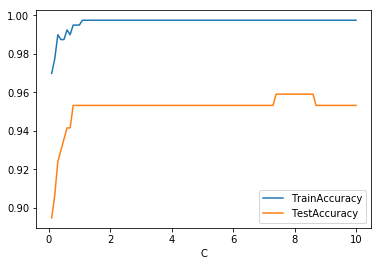

In [11]:
df_accruacy1.set_index("C",inplace=False).plot()

##### C 값이 커지면서 값이 증가하다가. 일정한 모습을 보인다. 7~8 사이에 갑자기 값이 증가하였다.
> **최적값 7.5 ~ 8.5**

### Gamma 조정

In [14]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,200):
    svm2 = SVC(gamma=gamma/100,random_state=1234)
    para_gamma.append(gamma/100)
    svm2.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(svm2.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(svm2.score(df_test_x_scaled,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["gamma"] = para_gamma
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy
df_accruacy2.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.985,0.942
1,0.02,0.995,0.959
2,0.03,0.995,0.953
3,0.04,0.997,0.953
4,0.05,0.997,0.953
5,0.06,0.997,0.936
6,0.07,0.997,0.936
7,0.08,0.997,0.930
8,0.09,0.997,0.930
9,0.10,0.997,0.918


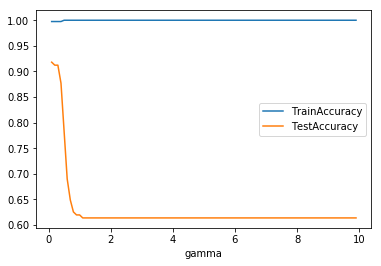

In [13]:
df_accruacy2.set_index("gamma",inplace=False).plot.line()

##### Gamma 값이 증가할수록 테스트 데이터에 대한 예측력이 급격히 감소함을 확인 할 수 있다.
> **최적값 0.02**

## 결과

In [15]:
result_model = SVC(gamma=0.02,C=8 ,random_state=1234)
result_model.fit(df_train_x_scaled,df_train_y)

print(result_model.score(df_train_x_scaled,df_train_y))
print(result_model.score(df_test_x_scaled,df_test_y))

0.9974874371859297
0.9532163742690059


##### 아무것도 넣지 않았을 경우와 비슷한 결과치를 보임

### Roc Curve

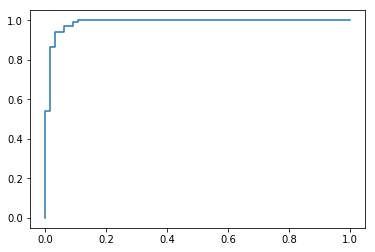

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(df_test_y, result_model.decision_function(df_test_x_scaled))

plt.plot(fpr, tpr, label="Kernel SVM")